# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score


In [93]:
dados = pd.read_csv('dummy.csv')

In [94]:
dados.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,True,True
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,False,True
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,False,True
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,True,True
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,True,False


In [95]:
dados.shape

(16650, 12)

In [96]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qtd_filhos             16650 non-null  int64  
 1   idade                  16650 non-null  float64
 2   tempo_emprego          16650 non-null  float64
 3   possui_celular         16650 non-null  int64  
 4   possui_fone_comercial  16650 non-null  int64  
 5   possui_fone            16650 non-null  int64  
 6   possui_email           16650 non-null  int64  
 7   qt_pessoas_residencia  16650 non-null  float64
 8   mau                    16650 non-null  bool   
 9   sexo_M                 16650 non-null  bool   
 10  posse_de_veiculo_Y     16650 non-null  bool   
 11  posse_de_imovel_Y      16650 non-null  bool   
dtypes: bool(4), float64(3), int64(5)
memory usage: 1.1 MB


In [97]:
dados.isnull().sum()

qtd_filhos               0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
sexo_M                   0
posse_de_veiculo_Y       0
posse_de_imovel_Y        0
dtype: int64

In [98]:
X = dados.drop('mau' , axis = 1)

In [99]:
y = dados['mau']

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [100]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 21)

In [101]:
clf = DecisionTreeClassifier()
clf.fit(X_train , y_train)

DecisionTreeClassifier()

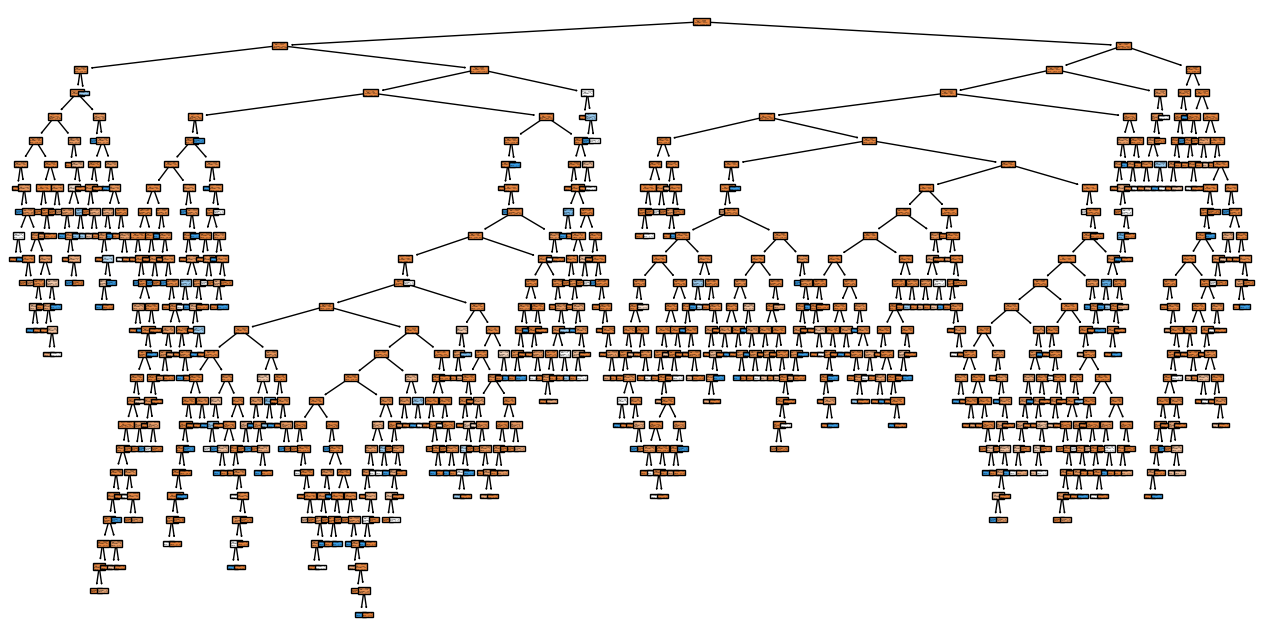

In [102]:
fig , ax = plt.subplots(figsize=(16 , 8))

plot_tree(clf ,
         filled = True
         )

plt.show()

In [103]:
ConfusionMatrixDisplay(clf)

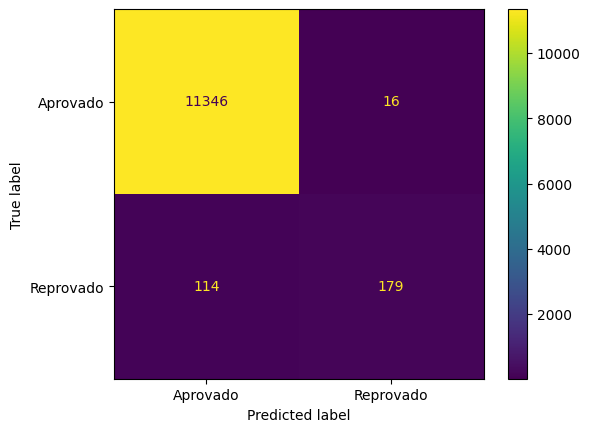

In [104]:
ConfusionMatrixDisplay(clf)
ConfusionMatrixDisplay.from_estimator(clf , X_train , y_train , display_labels = ['Aprovado' , 'Reprovado']);

In [105]:
predict_train = clf.predict(X_train)

In [91]:
accuracy_score(y_train , predict)

0.9768339768339769

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [75]:
clf.fit(X_test , y_test)

DecisionTreeClassifier()

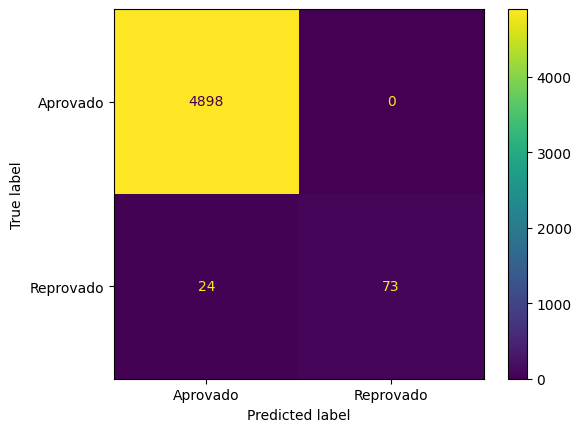

In [76]:
ConfusionMatrixDisplay(clf)
ConfusionMatrixDisplay.from_estimator(clf, X_test , y_test , display_labels = ['Aprovado' , 'Reprovado']);

In [106]:
predict_test = clf.predict(X_test)

In [107]:
print('A base de treino tem acurácia {}'.format(accuracy_score(y_train , predict_train)))
print('A base de teste tem acurácia {}'.format(accuracy_score(y_test , predict_test)))

A base de treino tem acurácia 0.9888459888459888
A base de teste tem acurácia 0.9737737737737737


### Treinando nova árvore

In [111]:
clf = DecisionTreeClassifier(random_state = 123 , min_samples_leaf = 5 , max_depth = 10)

In [112]:
clf.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

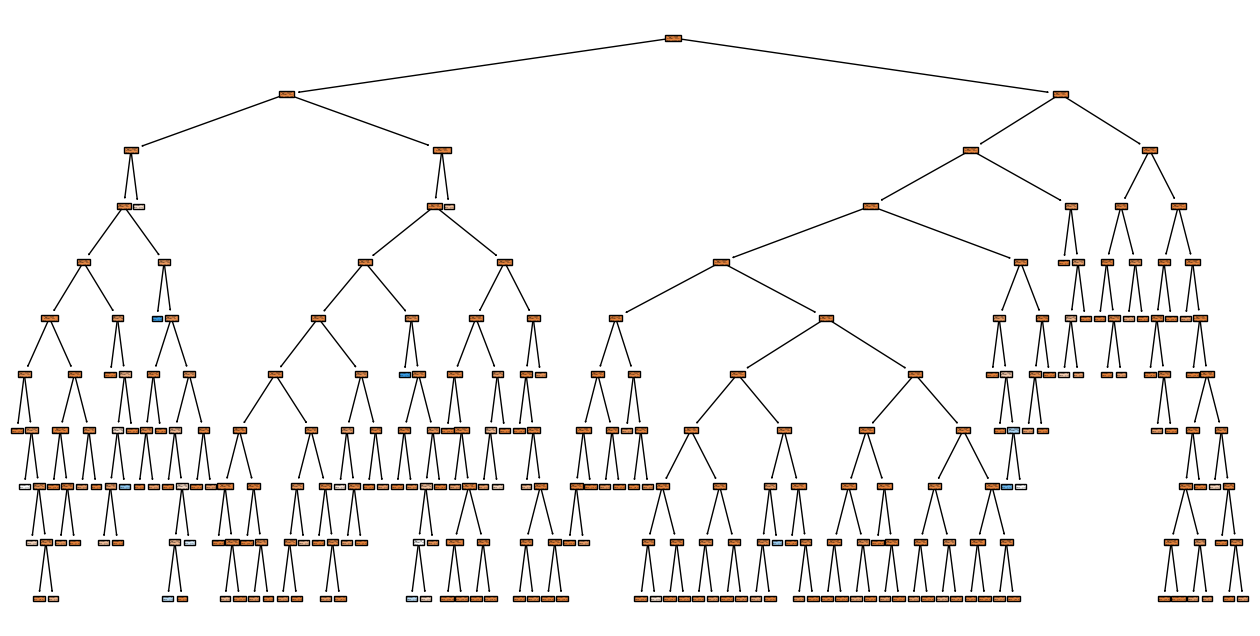

In [81]:
fig , ax = plt.subplots(figsize=(16 , 8))

plot_tree(clf,
         filled = True
         )

plt.show()

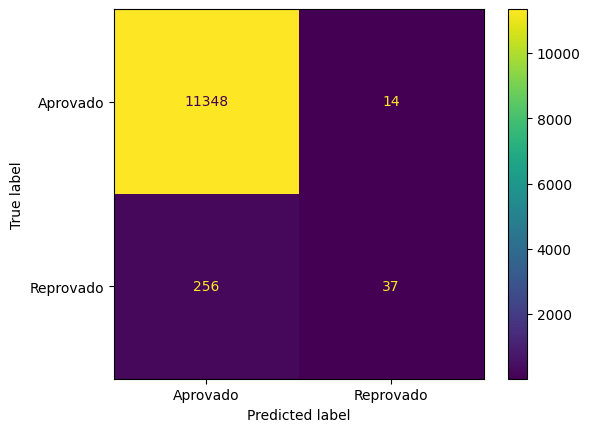

In [126]:
ConfusionMatrixDisplay(clf)
ConfusionMatrixDisplay.from_estimator(clf, X_train , y_train , display_labels = ['Aprovado' , 'Reprovado']);

In [83]:
predict = clf.predict(X_train)

In [120]:
accuracy_score(y_train , predict)

0.9768339768339769

In [141]:
# Calculando proporção de maus pagadores
aa = confusion_matrix(y_train , predict)[0][0]
ar = confusion_matrix(y_train , predict)[0][1]
ra = confusion_matrix(y_train , predict)[1][0]
rr = confusion_matrix(y_train , predict)[1][1]
total = aa + ar + ra + rr

print('A proporção de maus pagadores é de aproximadamente {:.2f}'.format((rr + ra) / total))

A proporção de maus pagadores é de aproximadamente 0.03


### Calculando acurácia para todos os contratos avaliados como "bons"

In [150]:
total_aprovados = aa + ar
print('A acurácia caso totos fossem classificados como bons pagadores é de {}'.format(total_aprovados / total)) 

A acurácia caso totos fossem classificados como bons pagadores é de 0.9748605748605749
